In [1]:
from tmg_hmc.sampler import TMGSampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(12)
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = np.eye(2)
sampler = TMGSampler(mu, sigma)

Checking positive semi-definiteness of Sigma...


# Linear Constraints

In [3]:
# Make second coordinate positive
#sampler.add_constraint(f=np.array([1,0])) # Works Correctly
#sampler.add_constraint(f=np.array([0,1]), c=-1) # Works correctly
sampler.add_constraint(f=np.array([0,1]), c=1) # Works correctly
#sampler.add_constraint(f=np.array([0,-1]), c=1) # Works correctly
sampler.add_constraint(f=np.array([1,1]), c=2)
sampler.add_constraint(f=np.array([-1,-2]), c=4)
#sampler.add_constraint(A=-np.eye(2), c=1)

In [4]:
x0 = np.array([0.5,1.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)

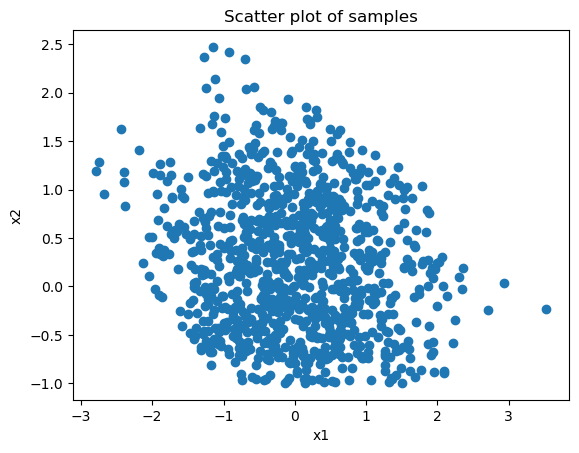

-1.994949928936106


In [5]:
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(min(samples[:,1] + samples[:,0]))

# Simple Quadratic Constraints

Checking positive semi-definiteness of Sigma...


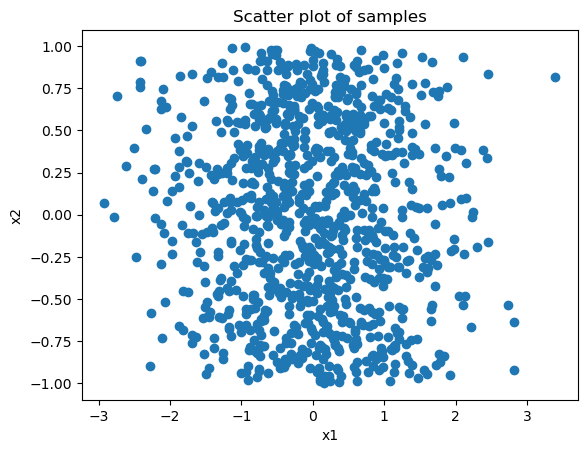

-0.9980693607698653
0.9955767407645968


In [6]:
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=np.array([[0,0],[0,-1]]), c=1) # X2^2 <= 1
x0 = np.array([0.5,0.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(min(samples[:,1]))
print(max(samples[:,1]))

Checking positive semi-definiteness of Sigma...


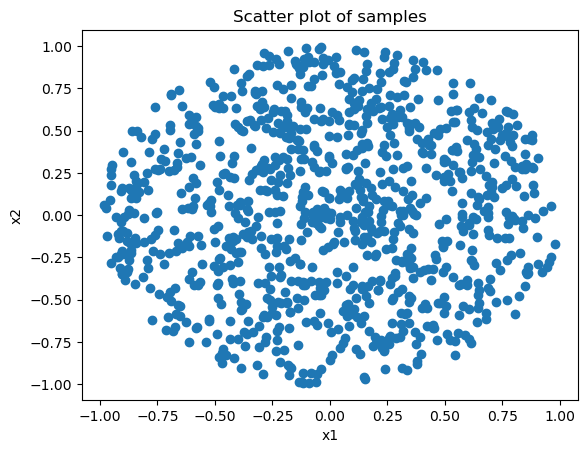

0.9992735394620993


In [7]:
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=np.array([[-1,0],[0,-1]]), c=1) # X1^2 + X2^2 <= 1
x0 = np.array([0.5,0.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(max(samples[:,1]**2 + samples[:,0]**2))

Checking positive semi-definiteness of Sigma...


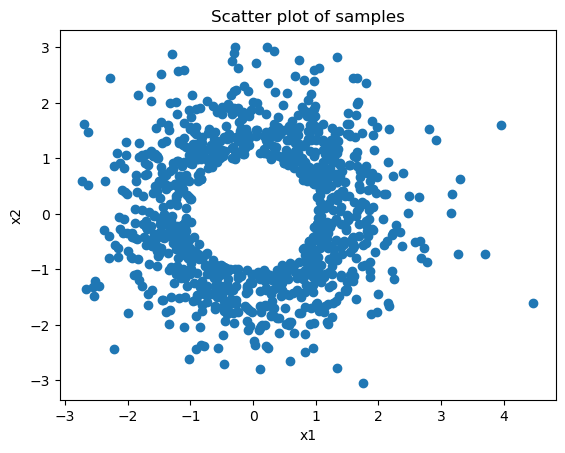

1.000321018200019


In [8]:
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=np.array([[1,0],[0,1]]), c=-1) # X1^2 + X2^2 >= 1
x0 = np.array([1.5,1.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(min(samples[:,1]**2 + samples[:,0]**2))

Checking positive semi-definiteness of Sigma...


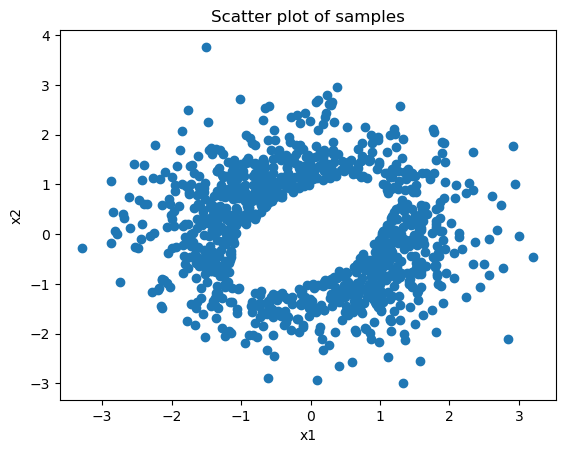

1.0019910292041507


In [9]:
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=np.array([[1,-0.5],[-0.5,1]]), c=-1) # X1^2 + X2^2 - X1 X2 >= 1
x0 = np.array([1.5,1.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(min(samples[:,1]**2 + samples[:,0]**2 - samples[:,1]*samples[:,0]))

Checking positive semi-definiteness of Sigma...


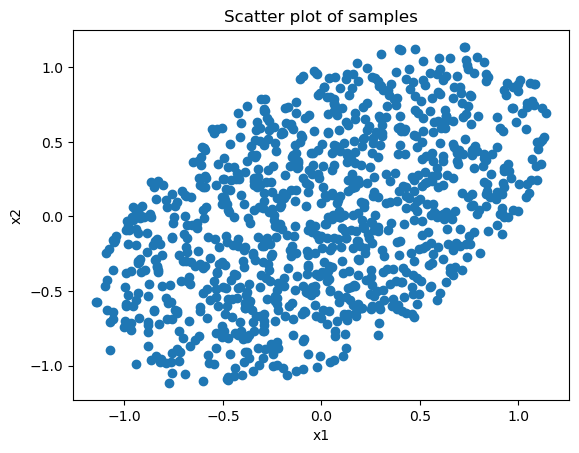

0.9993250617492709


In [10]:
sampler = TMGSampler(mu, sigma)
sampler.add_constraint(A=np.array([[-1,0.5],[0.5,-1]]), c=1) # X1^2 + X2^2 - X1 X2 <= 1
x0 = np.array([0.5,0.5]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of samples')
plt.show()
print(max(samples[:,1]**2 + samples[:,0]**2 - samples[:,1]*samples[:,0]))

# Quadratic Constraints

Checking positive semi-definiteness of Sigma...
burn-in iteration: 1 of 100
	Number of collision checks: 1
burn-in iteration: 2 of 100
	Number of collision checks: 1
burn-in iteration: 3 of 100
	Number of collision checks: 2
burn-in iteration: 4 of 100
	Number of collision checks: 1
burn-in iteration: 5 of 100
	Number of collision checks: 1
burn-in iteration: 6 of 100
	Number of collision checks: 1
burn-in iteration: 7 of 100
	Number of collision checks: 2
burn-in iteration: 8 of 100
	Number of collision checks: 1
burn-in iteration: 9 of 100
	Number of collision checks: 2
burn-in iteration: 10 of 100
	Number of collision checks: 2
burn-in iteration: 11 of 100
	Number of collision checks: 2
burn-in iteration: 12 of 100
	Number of collision checks: 1
burn-in iteration: 13 of 100
	Number of collision checks: 2
burn-in iteration: 14 of 100
	Number of collision checks: 1
burn-in iteration: 15 of 100
	Number of collision checks: 2
burn-in iteration: 16 of 100
	Number of collision checks: 2
b

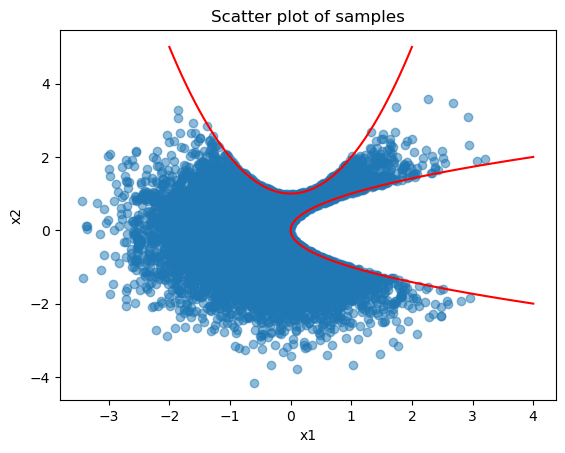

-0.9997487509758052


In [17]:
sampler = TMGSampler(mu, sigma, gpu=False)
sampler.add_constraint(A=np.array([[1.,0],[0,0]]), f=np.array([0,-1.]), c=1, sparse=False) # X2 <= X1^2 
sampler.add_constraint(A=np.array([[0,0],[0,1.]]), f=np.array([-1.,0]), c=0, sparse=False) # X1 <= X2^2
x0 = np.array([-1,0]).reshape(-1, 1)
samples = sampler.sample(x0, 10000, 100, verbose=True)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-2,2,100)
plt.plot(x, x**2+1, color='red')
plt.plot(x**2, x, color='red')
plt.title('Scatter plot of samples')
plt.show()
print(min(samples[:,0]**2 - samples[:,1]))

In [12]:
sampler.save('test.pkl')

In [13]:
loaded_sampler = TMGSampler.load('test.pkl')

burn-in iteration: 1 of 100
	Number of collision checks: 1
burn-in iteration: 2 of 100
	Number of collision checks: 1
burn-in iteration: 3 of 100
	Number of collision checks: 1
burn-in iteration: 4 of 100
	Number of collision checks: 1
burn-in iteration: 5 of 100
	Number of collision checks: 1
burn-in iteration: 6 of 100
	Number of collision checks: 2
burn-in iteration: 7 of 100
	Number of collision checks: 1
burn-in iteration: 8 of 100
	Number of collision checks: 2
burn-in iteration: 9 of 100
	Number of collision checks: 1
burn-in iteration: 10 of 100
	Number of collision checks: 1
burn-in iteration: 11 of 100
	Number of collision checks: 1
burn-in iteration: 12 of 100
	Number of collision checks: 2
burn-in iteration: 13 of 100
	Number of collision checks: 2
burn-in iteration: 14 of 100
	Number of collision checks: 1
burn-in iteration: 15 of 100
	Number of collision checks: 2
burn-in iteration: 16 of 100
	Number of collision checks: 1
burn-in iteration: 17 of 100
	Number of collision

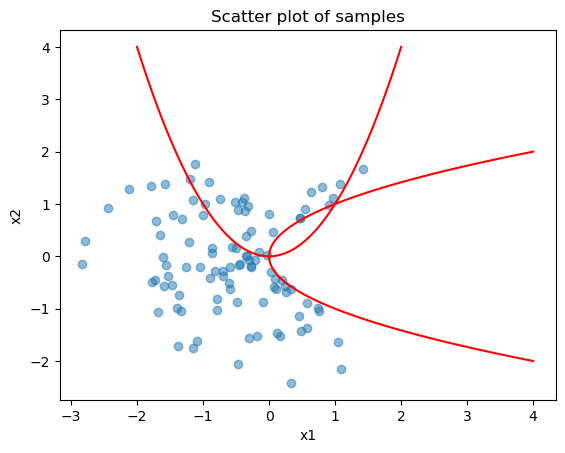

In [14]:
samples = loaded_sampler.sample(x0, 100, 100, verbose=True)
# Scatter plot
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-2,2,100)
plt.plot(x, x**2, color='red')
plt.plot(x**2, x, color='red')
plt.title('Scatter plot of samples')
plt.show()